In [1]:
import pandas as pd
import numpy as np

In [2]:
xls_CDNB = pd.ExcelFile(r'/Users/hongnhungvu/Desktop/Thesis_Data/CDNB_cleaned.xlsx')
df_NB = pd.read_excel(xls_CDNB)
xls_NLQ = pd.ExcelFile(r'/Users/hongnhungvu/Desktop/Thesis_Data/NLQ_cleaned.xlsx')
df_NLQ = pd.read_excel(xls_NLQ)
df_IT = df_NB.append(df_NLQ,ignore_index=True,sort=False) 

In [3]:
df_IT = df_IT.drop(df_IT[(df_IT.RegisterBuyVolume.isnull())&(df_IT.BuyVolume == 0)].index)
df_IT = df_IT.drop(df_IT[(df_IT.RegisterSellVolume.isnull())&(df_IT.SellVolume == 0)].index)

In [4]:
xls_1220 = pd.ExcelFile('/Users/hongnhungvu/Desktop/Thesis_Data/Data_IT/Data_Trading_2012_2020.xlsx')
xls_11 = pd.ExcelFile('/Users/hongnhungvu/Desktop/Thesis_Data/Data_IT/Data_Trading_2011.xlsx')
xls_21 = pd.ExcelFile('/Users/hongnhungvu/Desktop/Thesis_Data/Data_IT/Data_Trading_2021.xlsx')

df1_1220 = pd.read_excel(xls_1220, '1')
df2_1220 = pd.read_excel(xls_1220, '2')
df3_1220 = pd.read_excel(xls_1220, '3')
df4_11 = pd.read_excel(xls_11)
df5_21 = pd.read_excel(xls_21)

#Merge all into df_1121
df_1121 = df1_1220.append([df2_1220,df3_1220,df4_11,df5_21],ignore_index=True,sort=False)
df_1121_dup = df_1121.copy()
df_1121_dup.rename(columns={"TradingDate":"RegisterDate"}, inplace=True)

In [5]:
#Map 'Exchange' & 'KLCPGD' values using cols
cols =['StockCode','RegisterDate']
df_IT['Exchange'] = df_IT.set_index(cols).index.map(df_1121_dup.set_index(cols)['Exchange'])
df_IT['KLCPLH'] = df_IT.set_index(cols).index.map(df_1121_dup.set_index(cols)['KLCPLH'])

#Calculate date difference
from datetime import datetime
T0 = [d.date() for d in df_IT['RegisterDate']]
T1 = [d.date() for d in df_IT['DateStartExpected']]
T2 = [d.date() for d in df_IT['DateEndExpected']]
df_IT['Diff_days_T0_T1'] = np.busday_count(T0, T1)
df_IT['Diff_days_T1_T2'] = np.busday_count(T1, T2)

#Recalculate percentage values
df_IT['RegisterVolumeBeforePercent'] = df_IT['RegisterVolumeBefore']/df_IT['KLCPLH']
df_IT['RegisterVolumeAfterPercent'] = df_IT['RegisterVolumeAfter']/df_IT['KLCPLH']
df_IT['VolumeBeforePercent'] = df_IT['VolumeBefore']/df_IT['KLCPLH']
df_IT['VolumeAfterPercent'] = df_IT['VolumeAfter']/df_IT['KLCPLH']

#Cleaning data: drop all percentage values>1
df_IT = df_IT[(df_IT['RegisterVolumeBeforePercent'] < 1) &
               (df_IT['RegisterVolumeAfterPercent'] < 1) &
               (df_IT['VolumeBeforePercent'] < 1) & (df_IT['VolumeAfterPercent']<1)]

In [6]:
df_1121_dup['Percentage_quoted_spread']=(df_1121_dup['BestSell']-df_1121_dup['BestBuy'])/((df_1121_dup['BestBuy']+df_1121_dup['BestSell'])/2)

In [7]:
df_1121_dup = df_1121_dup.drop(df_1121_dup[df_1121_dup.BestBuy == 0].index)
df_1121_dup = df_1121_dup.drop(df_1121_dup[df_1121_dup.BestSell == 0].index)
df_1121_dup

,StockCode,Exchange,TodayEx,RegisterDate,OpenPrice,ClosePrice,CloseAdj,BestBuy,BestSell,TotalVol,TotalVal,KLCPLH,Percentage_quoted_spread
0,A32,UPCOM,UPCOM,2020-12-31,34500,34500,33185.274,30000,40000,200,6900000,6800000,0.285714
3,A32,UPCOM,UPCOM,2020-12-28,34600,35000,33666.220,30300,35000,500,17380000,6800000,0.143951
6,A32,UPCOM,UPCOM,2020-12-23,34500,34500,33185.274,34500,39600,2600,89860000,6800000,0.137652
7,A32,UPCOM,UPCOM,2020-12-22,34500,34500,33185.274,30000,34500,119,4020000,6800000,0.139535
8,A32,UPCOM,UPCOM,2020-12-21,30000,30000,28856.760,30000,34400,200,6000000,6800000,0.136646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570739,YEG,HOSE,HOSE,2021-01-08,46400,46000,46000.000,46700,46000,35100,1623000000,31279968,-0.015102
2570740,YEG,HOSE,HOSE,2021-01-07,46400,46700,46700.000,46700,46400,18300,853000000,31279968,-0.006445
2570741,YEG,HOSE,HOSE,2021-01-06,46400,46400,46400.000,46600,46400,31300,1455000000,31279968,-0.004301
2570742,YEG,HOSE,HOSE,2021-01-05,46800,46400,46400.000,46900,43550,49600,2260000000,31279968,-0.074074


In [8]:
df_IT = df_IT.drop(df_IT[df_IT.Diff_days_T1_T2 >= 46].index)

In [9]:
#Match spread 
df_IT_UPCOM = df_IT[df_IT['Exchange']=='UPCOM'].copy()

cols =['StockCode','RegisterDate']
for x in range(-30,0):
    df_IT_UPCOM['Spread_' + str(x)] = df_IT_UPCOM.set_index(cols).index.map(df_1121_dup.set_index(cols)['Percentage_quoted_spread'].shift(x))

df_IT_UPCOM['Spread_0'] = df_IT_UPCOM.set_index(cols).index.map(df_1121_dup.set_index(cols)['Percentage_quoted_spread'])

for x in range(1,36):
    df_IT_UPCOM['Spread_' + str(x)] = df_IT_UPCOM.set_index(cols).index.map(df_1121_dup.set_index(cols)['Percentage_quoted_spread'].shift(x))

In [10]:
df_UPCOM_buy = pd.DataFrame(df_IT_UPCOM[(df_IT_UPCOM['RegisterSellVolume'].isnull())])
df_UPCOM_sell = pd.DataFrame(df_IT_UPCOM[(df_IT_UPCOM['RegisterBuyVolume'].isnull())])

In [11]:
df_spread_buy_UPCOM = df_UPCOM_buy.iloc[:,34:100].copy()
df_spread_buy_UPCOM.columns = np.arange(-30,36)

df_spread_sell_UPCOM = df_UPCOM_sell.iloc[:,34:100].copy()
df_spread_sell_UPCOM.columns = np.arange(-30,36)

#df_HNX_buy.columns.get_indexer(['Spread_-30', 'Spread_35'])
#array([34, 99])

In [12]:
df_spread_buy_UPCOM['Period_length_T0_T1']= df_UPCOM_buy['Diff_days_T0_T1'].values
df_spread_sell_UPCOM['Period_length_T0_T1']= df_UPCOM_sell['Diff_days_T0_T1'].values

In [13]:
df_spread_buy_UPCOM_12345 = df_spread_buy_UPCOM[(df_spread_buy_UPCOM['Period_length_T0_T1']<=5)]

df_spread_buy_UPCOM_12345corrected = pd.DataFrame(df_spread_buy_UPCOM_12345.set_index('Period_length_T0_T1').stack())
df_spread_buy_UPCOM_12345corrected.index.set_names('Day', level=len(df_spread_buy_UPCOM_12345corrected.index.names)-1, inplace=True)
df_spread_buy_UPCOM_12345corrected.columns = ['Percentage Quoted Spread']

df_spread_sell_UPCOM_12345 = df_spread_sell_UPCOM[(df_spread_sell_UPCOM['Period_length_T0_T1']<=5)]

df_spread_sell_UPCOM_12345corrected = pd.DataFrame(df_spread_sell_UPCOM_12345.set_index('Period_length_T0_T1').stack())
df_spread_sell_UPCOM_12345corrected.index.set_names('Day', level=len(df_spread_sell_UPCOM_12345corrected.index.names)-1, inplace=True)
df_spread_sell_UPCOM_12345corrected.columns = ['Percentage Quoted Spread']

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize": (8, 8)})
plt.rcParams['figure.dpi'] = 360

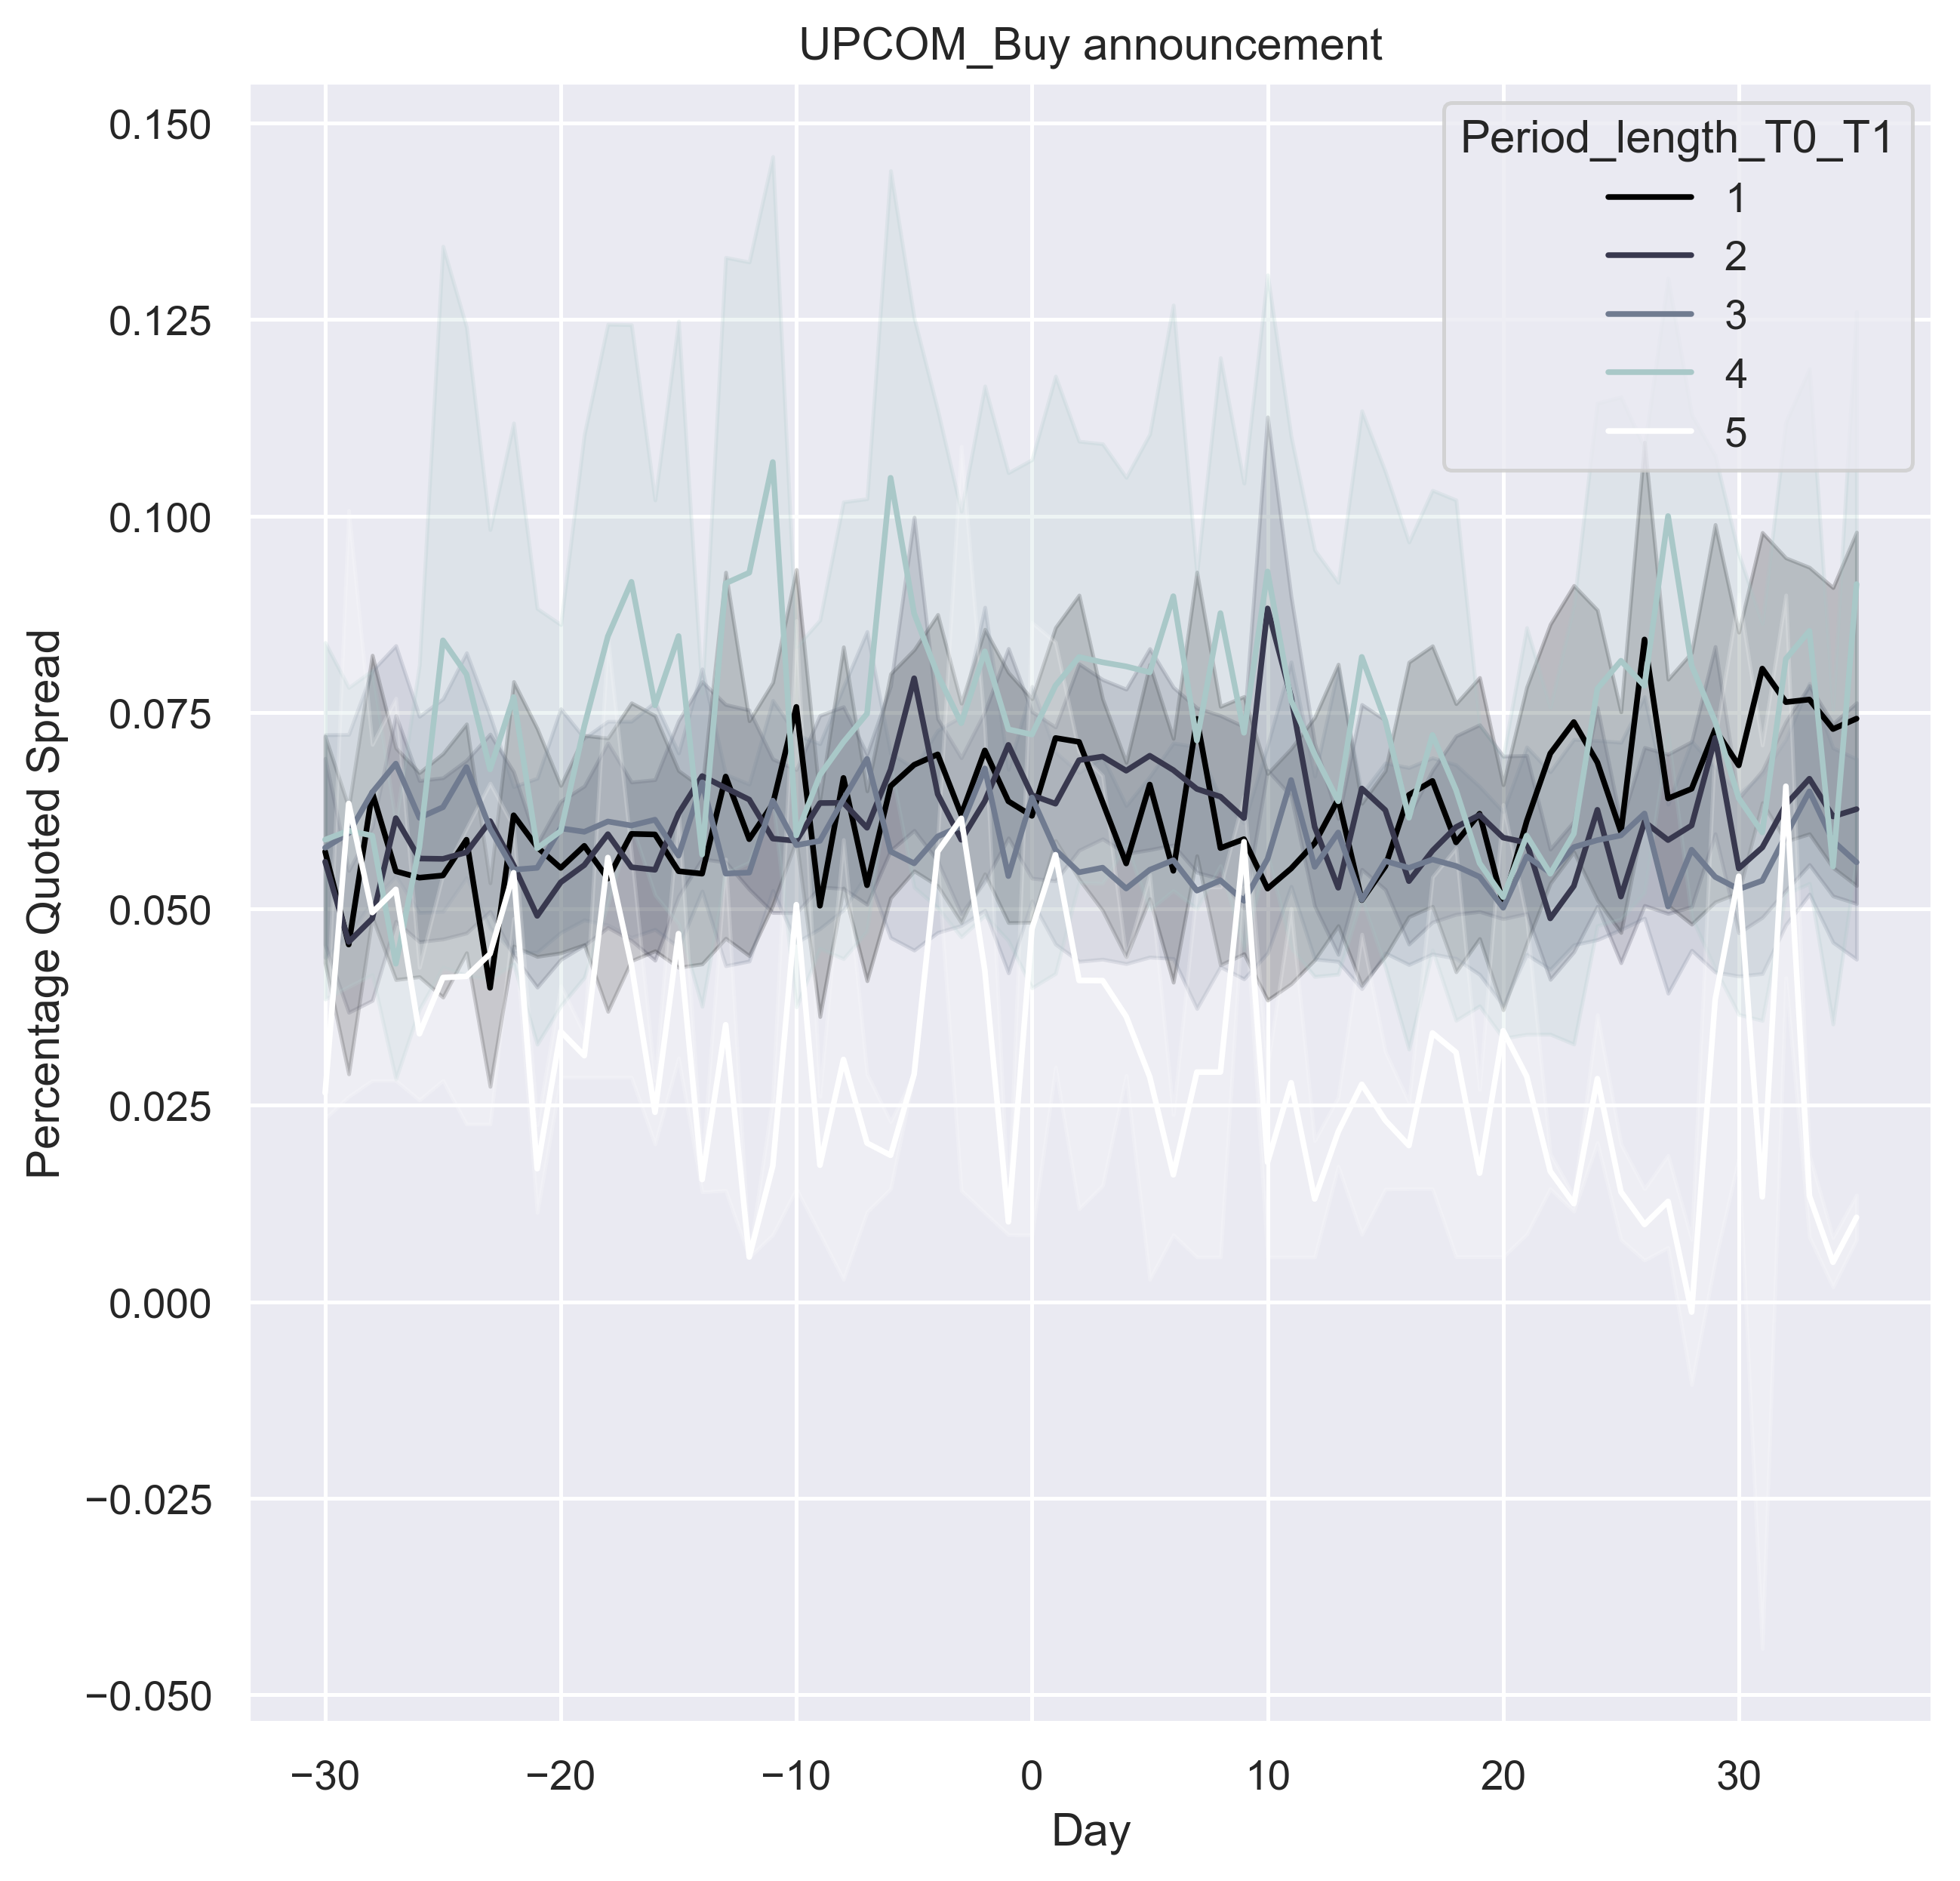

In [15]:
Spread_buy_UPCOM = sns.lineplot(data=df_spread_buy_UPCOM_12345corrected, x="Day", y="Percentage Quoted Spread",hue="Period_length_T0_T1",ci=90,palette ="bone").set(title='UPCOM_Buy announcement')
plt.savefig("Spread_buy_UPCOM.png")

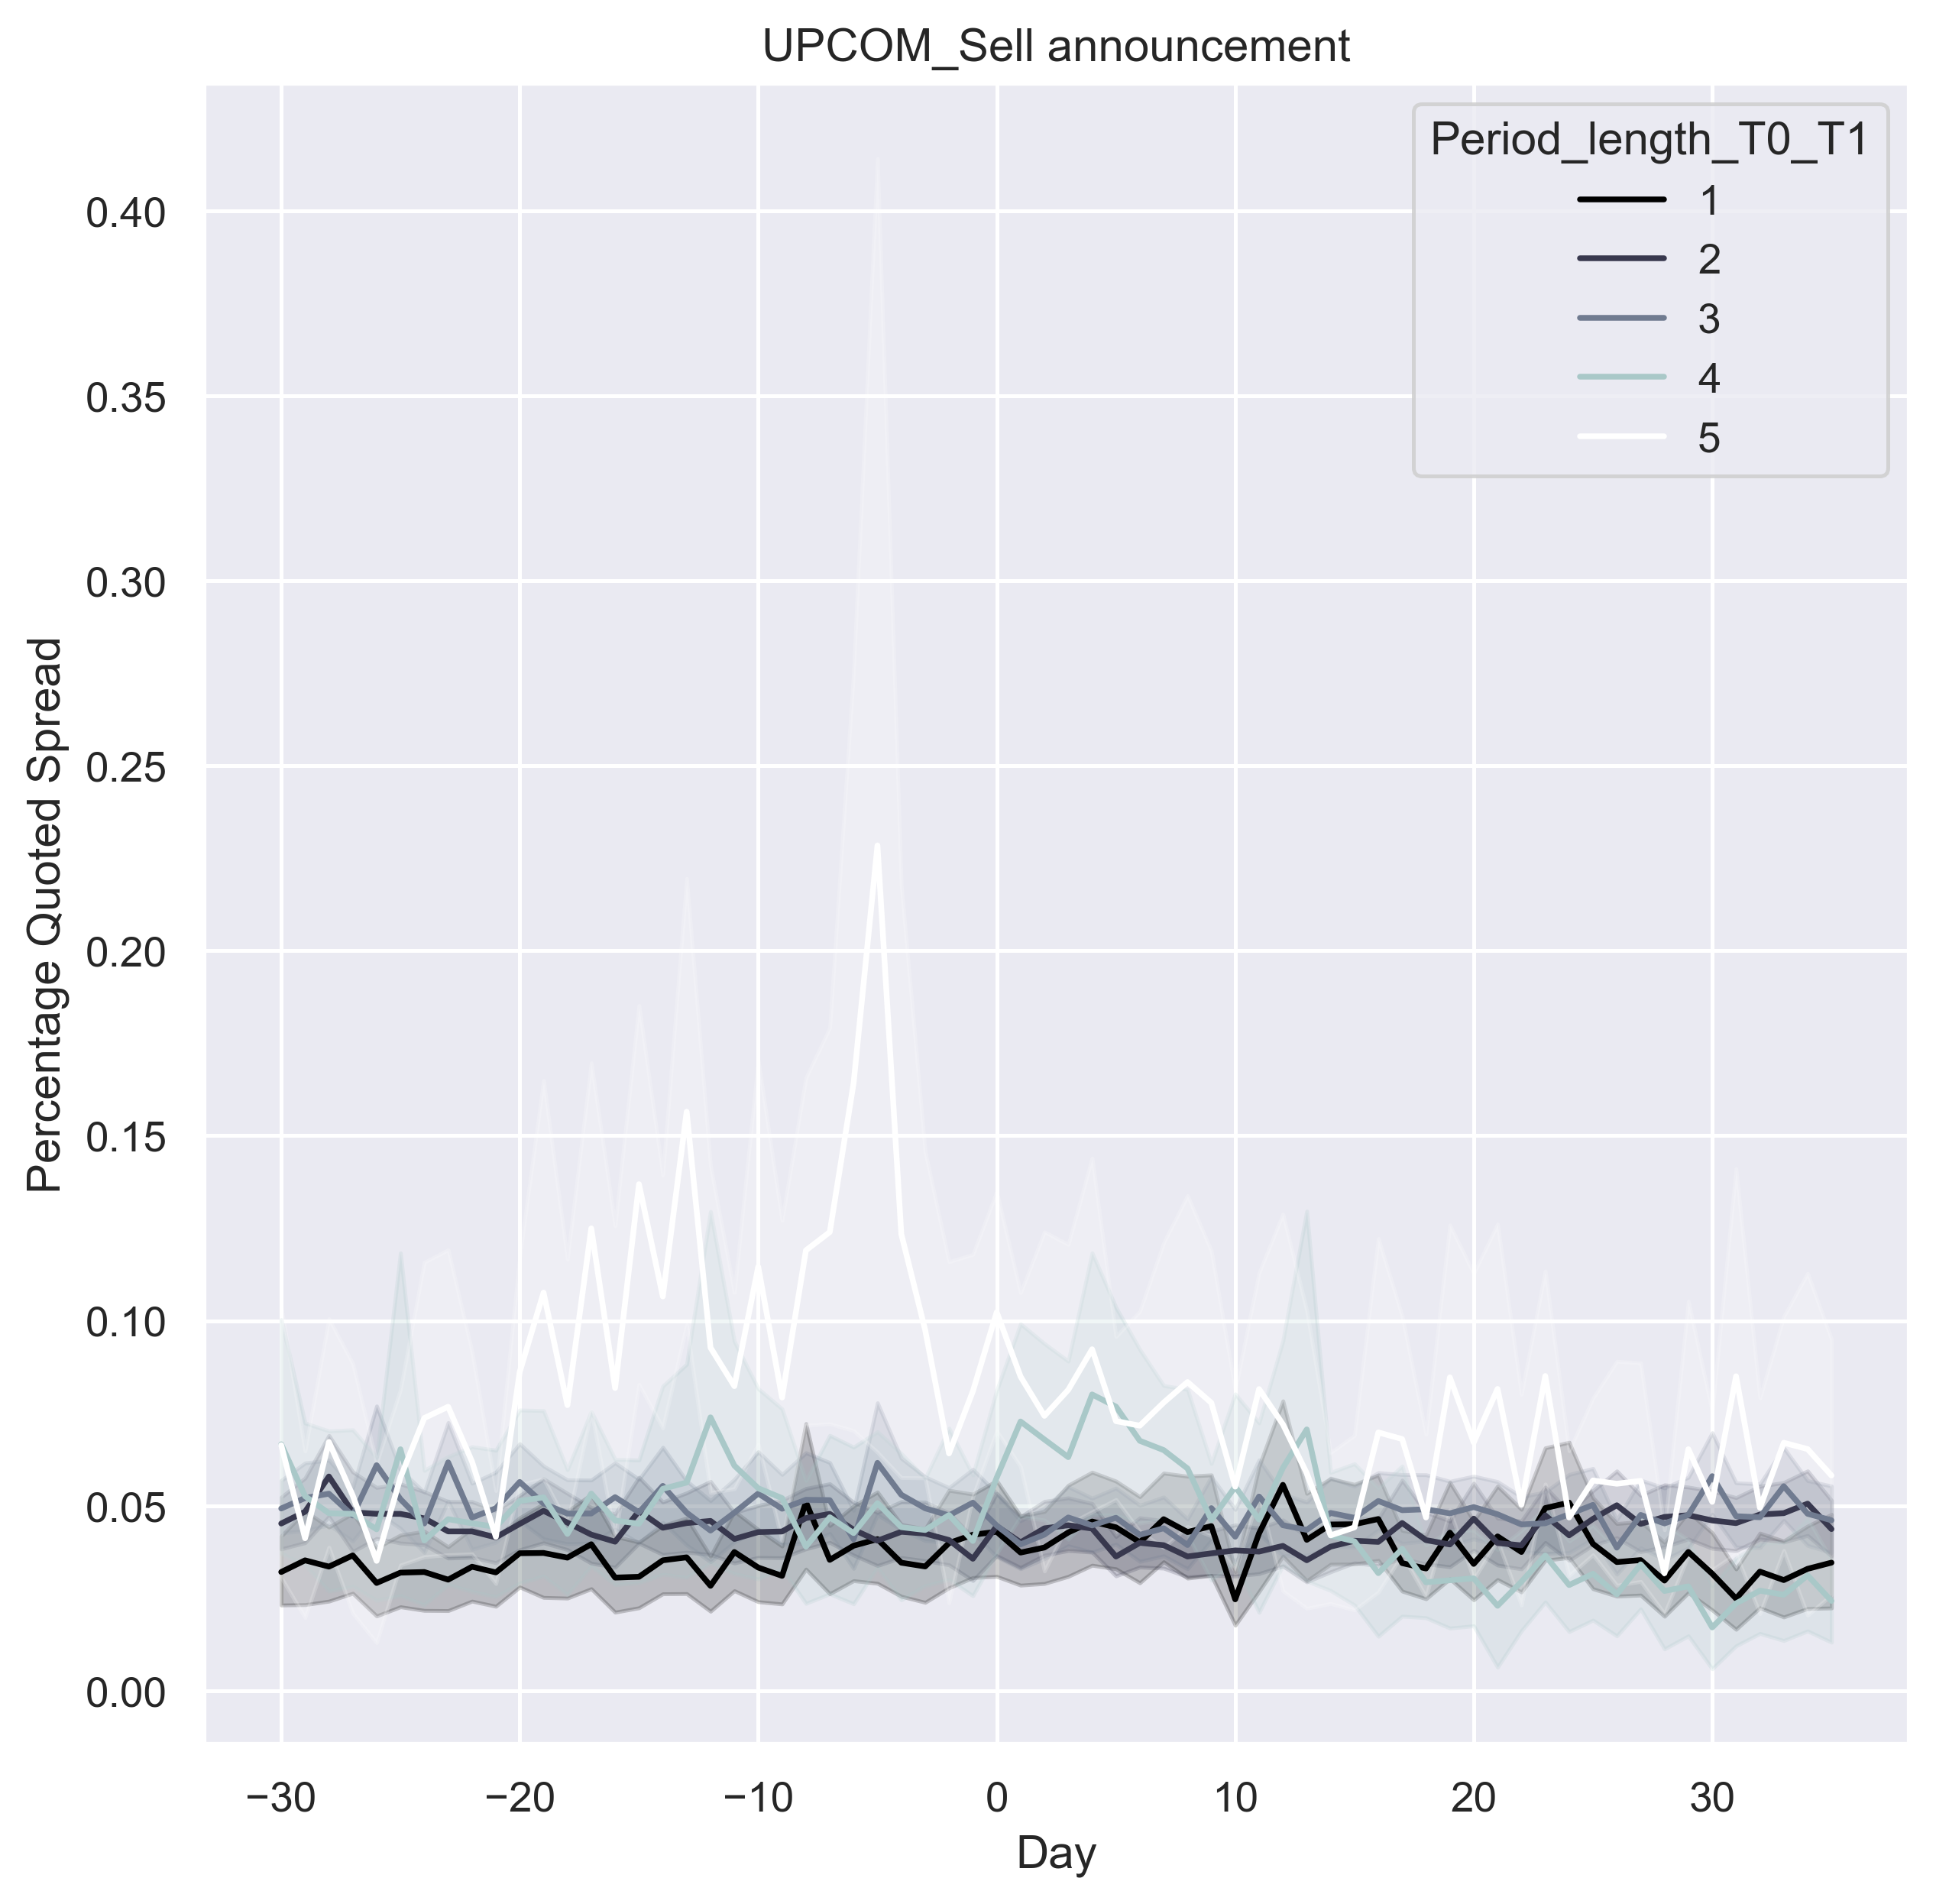

In [16]:
Spread_sell_UPCOM = sns.lineplot(data=df_spread_sell_UPCOM_12345corrected, x="Day", y="Percentage Quoted Spread",hue="Period_length_T0_T1",ci=90,palette ="bone").set(title='UPCOM_Sell announcement')
plt.savefig("Spread_sell_UPCOM.png")